/home/huan.wang/lessons/fastai-torch110/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/huan.wang/lessons/fastai-torch110/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/huan.wang/lessons/fastai-torch110/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


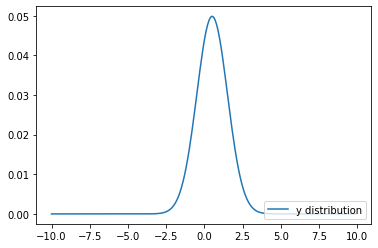

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import  torch.nn.functional as F

# 根据均值、标准差,求指定范围的正态分布概率值
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

x = np.arange(-10, 10, 0.1)
# 均值0.5 方差1 概率分布
y = normfun(x, 0.5, 1)

T = 1
y /= T

z = F.softmax(torch.tensor(y))
# plt.plot(x, z.numpy(), label="T = {0}".format(T))

T = 2
y /= T

z = F.softmax(torch.tensor(y))
# plt.plot(x, z.numpy(), label="T = {0}".format(T))

T = 4
y /= T

z = F.softmax(torch.tensor(y))
# plt.plot(x, z.numpy(), label="T = {0}".format(T))

plt.plot(x, y, label="y distribution")

plt.legend(loc="lower right")
plt.show()

In [2]:
import torch

def positionalEncoder(sentence_len,vocab_size):
    p=torch.zeros((sentence_len,vocab_size))

    #行
    rows=torch.arange(1,sentence_len+1,dtype=torch.float32).reshape(-1,1)
    #列的一半
    index=torch.arange(0,vocab_size+2,2,dtype=torch.float32)
    columns=torch.pow(10000,index/vocab_size).repeat(sentence_len).reshape(sentence_len,-1)
    #广播机制
    p[:,0::2]=torch.sin(rows/columns)[:,1:]
    p[:,1::2]=torch.cos(rows/columns)[:,:-1]

    return p

positionalEncoder(10,6)

tensor([[ 4.6399e-02,  5.4030e-01,  2.1544e-03,  9.9892e-01,  1.0000e-04,
          1.0000e+00],
        [ 9.2698e-02, -4.1615e-01,  4.3089e-03,  9.9569e-01,  2.0000e-04,
          9.9999e-01],
        [ 1.3880e-01, -9.8999e-01,  6.4633e-03,  9.9032e-01,  3.0000e-04,
          9.9998e-01],
        [ 1.8460e-01, -6.5364e-01,  8.6176e-03,  9.8281e-01,  4.0000e-04,
          9.9996e-01],
        [ 2.3000e-01,  2.8366e-01,  1.0772e-02,  9.7319e-01,  5.0000e-04,
          9.9994e-01],
        [ 2.7491e-01,  9.6017e-01,  1.2926e-02,  9.6147e-01,  6.0000e-04,
          9.9992e-01],
        [ 3.1922e-01,  7.5390e-01,  1.5080e-02,  9.4768e-01,  7.0000e-04,
          9.9989e-01],
        [ 3.6285e-01, -1.4550e-01,  1.7235e-02,  9.3185e-01,  8.0000e-04,
          9.9985e-01],
        [ 4.0570e-01, -9.1113e-01,  1.9389e-02,  9.1401e-01,  9.0000e-04,
          9.9981e-01],
        [ 4.4767e-01, -8.3907e-01,  2.1543e-02,  8.9420e-01,  1.0000e-03,
          9.9977e-01]])

In [3]:
import torch.nn as nn
#@save
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)


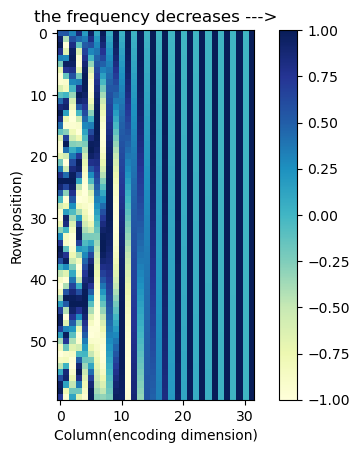

In [17]:
import numpy as np
import matplotlib.pyplot as plt

data=positionalEncoder(60,32).numpy()

# 使用Matplotlib绘制热力图
plt.imshow(data, cmap="YlGnBu")

# 显示颜色条
plt.colorbar()

# 可选：添加坐标轴标签等
plt.xlabel("Column(encoding dimension)")
plt.ylabel("Row(position)")
plt.title("the frequency decreases --->")

# 显示图表
plt.show()


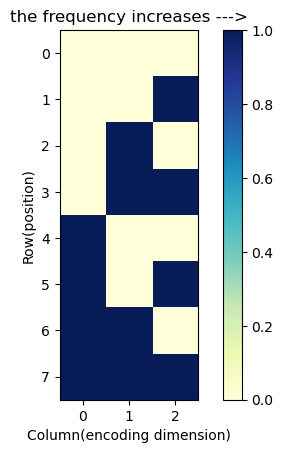

In [19]:
import numpy as np

# 创建一个8行3列的数组
rows = 8
cols = 3
binary_array = np.zeros((rows, cols), dtype=int)

# 填充数组，每行的数据是对应行数的二进制表示
for i in range(rows):
    binary_array[i, :] = [int(b) for b in format(i, f'0{cols}b')]

# 使用Matplotlib绘制热力图
plt.imshow(binary_array, cmap="YlGnBu")

# 显示颜色条
plt.colorbar()

# 可选：添加坐标轴标签等
plt.xlabel("Column(encoding dimension)")
plt.ylabel("Row(position)")
plt.title("the frequency increases --->")

# 显示图表
plt.show()


In [23]:
valid_lens = torch.tensor([2, 6])
print(valid_lens.dim())

1


In [46]:
import torch.nn as nn
import torch

embed_dim=32
num_heads=8

query=torch.randn((64,10,32))
key=torch.randn((64,24,28))
value=torch.randn((64,24,28))

multihead_attn = nn.MultiheadAttention(embed_dim, num_heads,batch_first=True,kdim=28,vdim=28)
attn_output, attn_output_weights = multihead_attn(query, key, value)
print(attn_output.shape)
print(attn_output_weights.shape)

torch.Size([64, 10, 32])
torch.Size([64, 10, 24])


如果：self.kdim == embed_dim and self.vdim == embed_dim 相等
 self._qkv_same_embed_dim=True

 self.head_dim = embed_dim // num_heads